In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('stop.csv')
df

,ion_Z,target_name,target_Z,target_A,phase,energy,stopping_power,percentage_error,publication_year,ref_id,citation_reference,doi
0,1,He,2,4.0026,g,66.0,7.025100,2.0,1983,Ba1983a,H.Baumgart.W.Arnold.H.Berg.E.Huttel and G.Clau...,10.1016/0167-5087(83)90093-5
1,1,He,2,4.0026,g,85.0,7.058300,2.0,1983,Ba1983a,H.Baumgart.W.Arnold.H.Berg.E.Huttel and G.Clau...,10.1016/0167-5087(83)90093-5
2,1,He,2,4.0026,g,96.0,7.065000,2.0,1983,Ba1983a,H.Baumgart.W.Arnold.H.Berg.E.Huttel and G.Clau...,10.1016/0167-5087(83)90093-5
3,1,He,2,4.0026,g,154.0,6.227500,2.0,1983,Ba1983a,H.Baumgart.W.Arnold.H.Berg.E.Huttel and G.Clau...,10.1016/0167-5087(83)90093-5
4,1,He,2,4.0026,g,200.0,5.562900,2.0,1983,Ba1983a,H.Baumgart.W.Arnold.H.Berg.E.Huttel and G.Clau...,10.1016/0167-5087(83)90093-5
...,...,...,...,...,...,...,...,...,...,...,...,...
9379,1,U,92,238.0300,s,14000.0,0.005344,0.8,1973,Sö1973,H.Sörensen and H.H.Andersen. Phys.Rev. B8.1854...,10.1103/physrevb.8.1854
9380,1,U,92,238.0300,s,15000.0,0.005103,0.8,1973,Sö1973,H.Sörensen and H.H.Andersen. Phys.Rev. B8.1854...,10.1103/physrevb.8.1854
9381,1,U,92,238.0300,s,16000.0,0.004886,0.8,1973,Sö1973,H.Sörensen and H.H.Andersen. Phys.Rev. B8.1854...,10.1103/physrevb.8.1854
9382,1,U,92,238.0300,s,17000.0,0.004688,0.8,1973,Sö1973,H.Sörensen and H.H.Andersen. Phys.Rev. B8.1854...,10.1103/physrevb.8.1854


In [24]:
df_fil = df.drop(columns=['ion_Z', 'target_name', 'percentage_error', 'publication_year', 'ref_id', 'citation_reference', 'doi'])

df_fil['phase'] = df_fil['phase'].replace('g', 1).replace('s', 0)

In [25]:
X = df_fil.drop(['stopping_power'], axis=1) # features
y = df_fil['stopping_power'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=18)

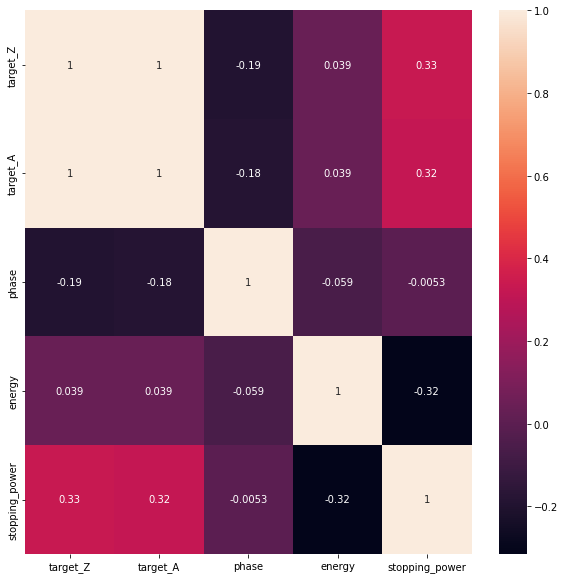

In [50]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_fil.corr(), annot=True)
plt.savefig('heatmap.jpeg', dpi=300)


Métricas de desempenho (conjunto de treino) - Regressão linear
R^2 =  0.247650082706925
MSE =  96.06431678085113
MAE =  7.92872742434032

Métricas de desempenho (conjunto de teste) - Regressão linear
R^2 =  0.23061620526900806
MSE =  97.60147314266563
MAE =  8.02392319495858


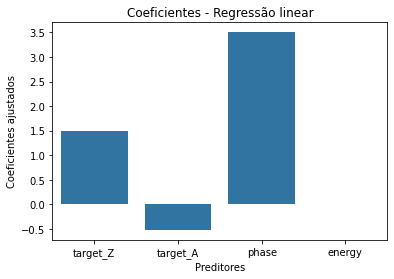

In [35]:
# REGRESSÃO LINEAR

regr = linear_model.LinearRegression() # Create regressor
regr.fit(X_train, y_train) # Train regressor

y_pred_train = regr.predict(X_train) # predição para o conjunto de treino
y_pred_test = regr.predict(X_test) # predição para o conjunto de teste

# Gráfico dos coeficientes ajustados
coef = regr.coef_
fig = sns.barplot (x=X.columns, y=coef)
plt.xlabel("Preditores")
plt.ylabel("Coeficientes ajustados")
plt.title("Coeficientes - Regressão linear")
print()
     
# Métricas de desempenho - conjunto de treino
print('Métricas de desempenho (conjunto de treino) - Regressão linear')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print()
     

# Métricas de desempenho - conjunto de teste
print('Métricas de desempenho (conjunto de teste) - Regressão linear')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))


Métricas de desempenho (conjunto de treino) - Regressão Lasso
R^2 =  0.24717533149275783
MSE =  96.12493571624483
MAE =  7.9165341437082

Métricas de desempenho (conjunto de teste) - Regressão Lasso
R^2 =  0.23111296321312647
MSE =  97.53845607956485
MAE =  8.003866556094644


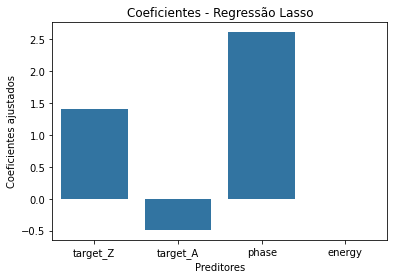

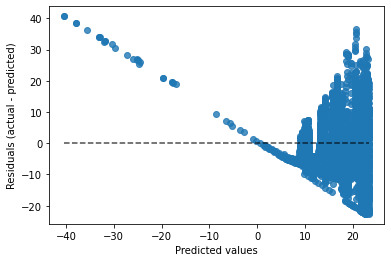

In [55]:
lassoReg = Lasso(alpha=0.06, max_iter=10**7)
lassoReg.fit(X_train,y_train)

y_pred_train = lassoReg.predict(X_train) # predição para o conjunto de treino
y_pred_test = lassoReg.predict(X_test) # predição para o conjunto de teste

# Gráfico dos coeficientes ajustados
coef = lassoReg.coef_
fig = sns.barplot (x=X.columns, y=coef)
plt.xlabel("Preditores")
plt.ylabel("Coeficientes ajustados")
plt.title("Coeficientes - Regressão Lasso")
print()
     
# Métricas de desempenho - conjunto de treino
print('Métricas de desempenho (conjunto de treino) - Regressão Lasso')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print()
     

# Métricas de desempenho - conjunto de teste
print('Métricas de desempenho (conjunto de teste) - Regressão Lasso')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))

display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_test)
display.plot()
plt.show()

/home/bruno/.local/lib/python3.10/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/bruno/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/bruno/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.704e+05, tolerance: 7.189e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast

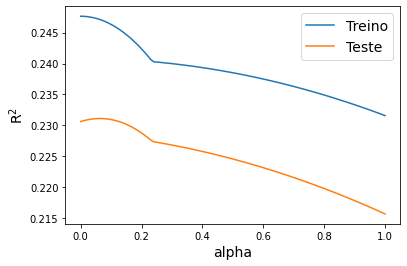

In [49]:
da = 0.01
at = 101

R_train = np.zeros(at)
R_test = np.zeros(at)
alpha = np.array([da*i for i in range(at)])

for i in range(at):

    lassoReg = Lasso(alpha=da*i, max_iter=10**7)
    lassoReg.fit(X_train,y_train)
    y_pred_train = lassoReg.predict(X_train) # predição para o conjunto de treino
    y_pred_test = lassoReg.predict(X_test) # predição para o conjunto de teste

    R_train[i] = r2_score(y_train, y_pred_train)
    R_test[i] = r2_score(y_test, y_pred_test)

plt.plot(alpha, R_train, label='Treino')
plt.plot(alpha, R_test, label='Teste')
plt.legend(fontsize=14)
plt.xlabel('alpha', fontsize=14)
plt.ylabel('R$^2$', fontsize=14)
plt.savefig('Lasso-R2', dpi=300)
plt.show()

In [54]:
print(max(R_test), max(R_train))
print(alpha[np.argmax(R_test)], alpha[np.argmax(R_train)])

0.23111296321312647 0.2476500827069248
0.06 0.0


In [ ]:
clf_rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [450, 500, 550],
    'max_depth': [4, 5, 6],
}

# Realizar a busca em grade com validação cruzada
grid_search = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Melhor estimador
best_rf = grid_search.best_estimator_

# Treinar o modelo com os melhores hiperparâmetros
best_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de treino e teste
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Calcular o MSE para o conjunto de treino e teste
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print('MSE no conjunto de treino:', mse_train)
print('MSE no conjunto de teste:', mse_test)